In [12]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Challenge 1

In [82]:
movies = pd.read_csv("2013_movies.csv")
movies['ReleaseDate'] = pd.to_datetime(movies['ReleaseDate'])
movies.head()


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14


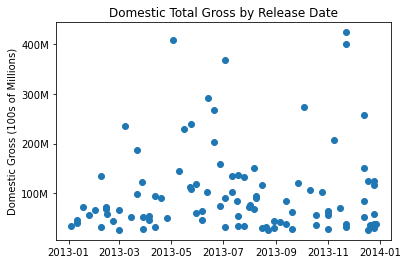

In [142]:
plt.scatter("ReleaseDate", "DomesticTotalGross", data = movies)
plt.title('Domestic Total Gross by Release Date')
plt.ylabel("Domestic Gross (100s of Millions)")
plt.yticks(ticks=[100000000,200000000,300000000,400000000], labels = ["100M","200M","300M","400M"]);

## Challenge 2

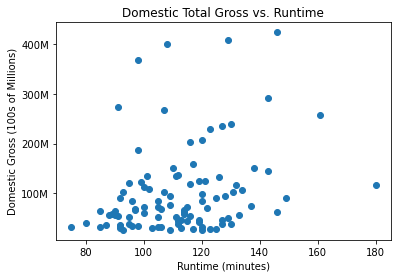

In [141]:
plt.scatter("Runtime", "DomesticTotalGross", data = movies)
plt.title('Domestic Total Gross vs. Runtime')
plt.xlabel("Runtime (minutes)")
plt.ylabel("Domestic Gross (100s of Millions)")
plt.yticks(ticks=[100000000,200000000,300000000,400000000], labels = ["100M","200M","300M","400M"]);

## Challenge 3

In [85]:
average_rating = movies.groupby("Rating")["DomesticTotalGross","Runtime"].mean()
average_rating

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,DomesticTotalGross,Runtime
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


## Challenge 4

In [86]:
Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

SyntaxError: invalid syntax (<ipython-input-86-042f38c67402>, line 1)

In [87]:
G = movies[movies["Rating"] == "G"]
PG = movies[movies["Rating"] == "PG"]
PG13 = movies[movies["Rating"] == "PG-13"]
R = movies[movies["Rating"] == "R"]

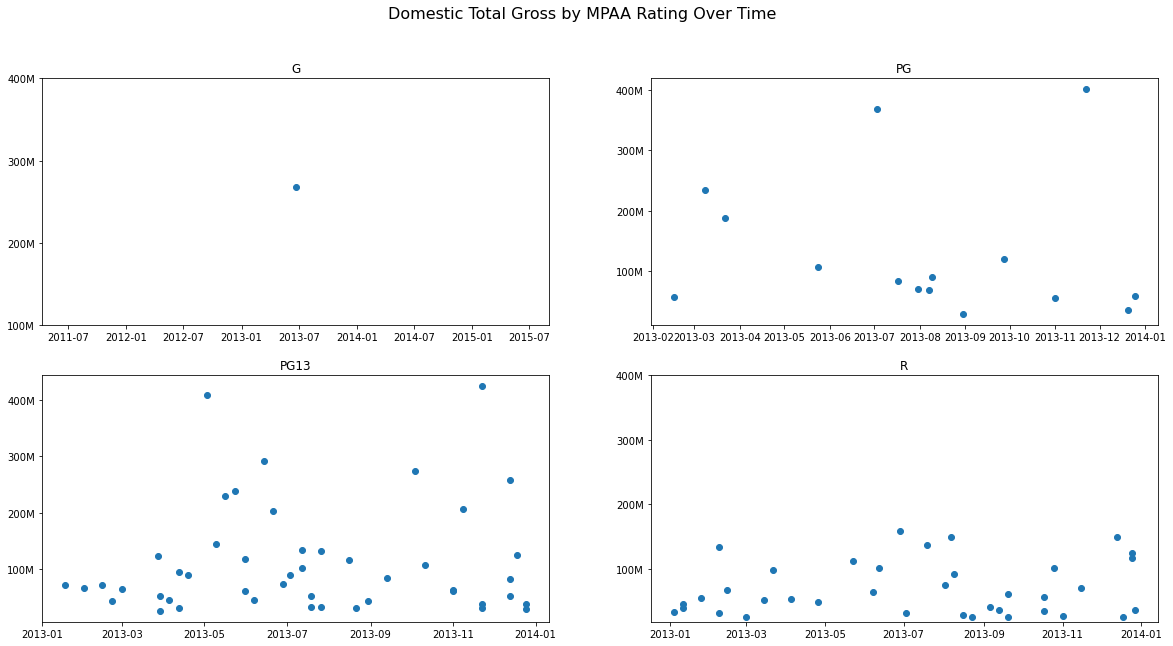

In [149]:
plt.figure(figsize=[20,10])

plt.suptitle('Domestic Total Gross by MPAA Rating Over Time',fontsize = 16)

plt.subplot(2,2,1) # (number of rows, number of columns, number of plot)
plt.scatter("ReleaseDate", "DomesticTotalGross", data = G)
plt.title('G')
plt.yticks(ticks=[100000000,200000000,300000000,400000000], labels = ["100M","200M","300M","400M"])

plt.subplot(2,2,2)
plt.scatter("ReleaseDate", "DomesticTotalGross", data = PG)
plt.title('PG')
plt.yticks(ticks=[100000000,200000000,300000000,400000000], labels = ["100M","200M","300M","400M"])

plt.subplot(2,2,3)
plt.scatter("ReleaseDate", "DomesticTotalGross", data = PG13)
plt.title('PG13')
plt.yticks(ticks=[100000000,200000000,300000000,400000000], labels = ["100M","200M","300M","400M"])

plt.subplot(2,2,4)
plt.scatter("ReleaseDate", "DomesticTotalGross", data = R)
plt.title('R')
plt.yticks(ticks=[100000000,200000000,300000000,400000000], labels = ["100M","200M","300M","400M"]);

I struggled to get the dates to line up on the x axis. Would like to be consistent like they are on the y.

## Challenge 5

In [89]:
movies.sort_values(by="DomesticTotalGross",ascending = False).iloc[0]

Title                 The Hunger Games: Catching Fire
Budget                                        1.3e+08
DomesticTotalGross                          424668047
Director                             Francis Lawrence
Rating                                          PG-13
Runtime                                           146
ReleaseDate                       2013-11-22 00:00:00
Name: 0, dtype: object

## Challenge 6

In [ ]:
Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

In [96]:
movies['month'] = movies['ReleaseDate'].dt.month

In [135]:
gross_by_month = movies.groupby(['month'], as_index=True).agg(
                      {'DomesticTotalGross':['mean','std']})
mean = gross_by_month["DomesticTotalGross","mean"]
std = gross_by_month["DomesticTotalGross","std"]

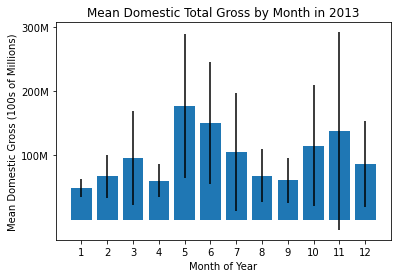

In [147]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],mean,yerr=std)
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.ylabel("Mean Domestic Gross (100s of Millions)")
plt.xlabel("Month of Year")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.yticks(ticks=[100000000,200000000,300000000], labels = ["100M","200M","300M"]);

The error bars look relatively reasonable, besides month 11, which seems to imply a negative value?